tutorial outline:
- A) foundations
- simple Data summarization 
- B) unsupervised learning as part of descriptive analytics
- Cluster Analysis
- Generating data for cluster analysis 
- kMeans Algorithm using sklearn


# A) Foundations of descriptive analytics


In [ ]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Some configuration of the plots we will create later
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)

## The HMEQ data set reloaded

Our data set consists of 5,960 observations and 13 features including the target variable. Remember, the variables are defined as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio


In [ ]:
import pandas as pd 

### Loading data from disk


In [ ]:
# You have to update the code such that the variable file includes the correct path to the csv file on your computer
# file = '../data/hmeq_prepared.csv'
df = pd.read_csv('https://www.dropbox.com/s/cjaidhekppvudjq/hmeq_prepared.csv?dl=1')

# recode the variables as in the data_preprocessing Notebook
df['REASON'] = df['REASON'].astype('category')
df['JOB'] = df['JOB'].astype('category')
# The target variable has only two states so that we can store it as a boolean
df['BAD'] = df['BAD'].astype('bool')
# For simplicity, we also convert LOAN to a float so that all numeric variables are of type float
df['LOAN'] = df['LOAN'].astype(np.float64)


To convince yourself that data loading was successful, you can simply make Python outputting a summary of the data by typing the variable name of the data frame object; that is `df` in the example.

In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEROGzero
0,True,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366670,1.0,9.0,34.818260,True
1,True,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833336,0.0,14.0,34.818260,True
2,True,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466660,1.0,10.0,34.818260,True
3,True,1500.0,65019.0,89235.5,IsMissing,Other,7.0,0.0,0.0,173.466660,1.0,20.0,34.818260,True
4,False,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333336,0.0,14.0,34.818260,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,59900.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808720,0.0,16.0,36.112347,True
5956,False,59900.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692060,0.0,15.0,35.859970,True
5957,False,59900.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279700,0.0,15.0,35.556590,True
5958,False,59900.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892720,0.0,16.0,34.340880,True


### Simple Data Summarization: Aggregation and grouping
The `describe()` function already introduces functionality that aggregates the data in a data frame. Aggregations are extremely useful in EDA and for feature engineering. One of the function that you need to know when it comes to aggregations is `value_counts()`. Our data represents a classification problem. So you would want to know the relative frequencies of the target variable values. This is only one of the many useful ways in which you can leverage the function.   

In [ ]:
# Count the frequency of good and bad credit risks
df.BAD.value_counts()

False    4771
True     1189
Name: BAD, dtype: int64

Ok, knowing the good to bad ratio is clearly useful. Another standard question for classification problems would be how feature values distribute across the classes (i.e., good and bad borrowers). Time to introduce yet another important Python function: `group_by()`. You might remember the *group by* clause from SQL. Data frames offer similar functionality. The function is quite powerful. We could have a whole tutorial only on `group_by()`. Fortunately, such tutorial already exists (see, e.g., [here](https://realpython.com/pandas-groupby/) or check out the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)). For now, we leave it with a simple demo to sketch what you can do with `group_by()` 

In [ ]:
df.groupby("BAD")["LOAN"].mean()

BAD
False    18861.077342
True     16846.509672
Name: LOAN, dtype: float64

We just calculated the mean loan amount using the target variable for grouping. We find that bad clients borrow less money than good clients, on average. The lender might be pleased to know that. Better than the opposite result, right? But let's not dive too deep into financial implications. Our point was to showcase grouping. Let's extend the demo.

In [ ]:
# We can group multiple features in one go
df.groupby("BAD")[["LOAN", "MORTDUE", "VALUE"]].mean()

,LOAN,MORTDUE,VALUE
BAD,,,
False,18861.077342,73393.894075,102059.850918
True,16846.509672,68043.478192,94381.183188


In [ ]:
# We can use any aggregation function that Pandas supports, including the median
df.groupby("BAD")[["LOAN", "MORTDUE", "VALUE"]].median()  
# or computing quantiles
# df.groupby("BAD")[["LOAN", "MORTDUE", "VALUE"]].quantile(q=0.95)

,LOAN,MORTDUE,VALUE
BAD,,,
False,16900.0,65019.0,90599.0
True,14900.0,63800.0,86400.0


In [ ]:
# and in case you wonder, the output that we received from the above demos is just a Pandas series object
type(df.groupby("BAD")["LOAN"].mean())

pandas.core.series.Series

# B) Advanced Descriptive Analytics based Unsupervised Learning: Cluster Analysis 

Cluster analysis is a good example of unsupervised machine learning or machine learning with unlabeled data (no specified target variable). Unsupervised learning algorithms attempt to group observations based on their similarities in features values. In the end, we can try to describe clusters and how they differ from one another. That task, however, is not supported by the algorithm and requires domain expertise. 

An example of this application could be analyzing data from a survey. We may have several distinct groups of potential buyers who reveal distinct preferences through their choices. Cluster analysis can group similar responses and thereby identify groups of buyers with similar preferences. We can then characterize the clusters and develop targeted marketing initiatives.

## Data Generation for cluster analysis

In order to verify that this method of analysis works, we can generate data using sklearn. The function `make_blob()` allows us to create a data for clustering. In a nutshell, we generate data from two Gaussian distributions. The function allows specifying the parameters of these Gaussians. This way, we can decide how similar or how dissimilar we want our data to be. Have a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to appreciate the full functionality of the function. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

np.random.seed(888)

In [ ]:
# Generate data in two dimensions using make_blobs:

# Let us first specify some parameters. It is good practice to play with these and verify the effect of such changes
n       = 500                 # no. samples
centers = [(-2, -2), (2, 2)]  # centers of the two Gaussians
std     = 2                   # standard deviaton

# Call the function and obtain your data
X, y = make_blobs(n_samples = n, centers = centers, cluster_std = std)

In [ ]:
X.shape, y.shape # ensure shape is as expected

((500, 2), (500,))

In [ ]:
X[:5] # since X is a NumPy array, use slicing to inspect the data instead of .head() as we would for a pandas DataFrame

array([[-0.26824611, -1.07418431],
       [-4.12196836, -1.73630937],
       [-1.64115373, -4.52581442],
       [ 1.14398146, -0.26504303],
       [ 1.02066215, -1.76253437]])

The function `make_blobs()` also provides a **true cluster assignment** for every data point in the array `y`. By the way we called that function, we have implicitly asked it to create data points for two different clusters. Make sure you understand how that has happened. Which part of the above code would we need to change and how to generate data from, say three different clusters? Check the documentation of `make_blobs()` and/or run a web search to answer this question. As always, it is good practice to play with our demo codes. Try generating and plotting data from three, four, or five different clusters.

In [ ]:
y[:5] # true cluster assignment for each data point

array([0, 0, 0, 1, 0])

A picture says more than a thousand words, they say. So let's take a look at our data. Fortunately, we created two-dimensional data so plotting should be easy. We can make use of the variable `y` to color the plot. Recall that the array `y`, which is of the same length as X that specifies, for each data point, to which Gaussian (i.e., cluster) it belongs.

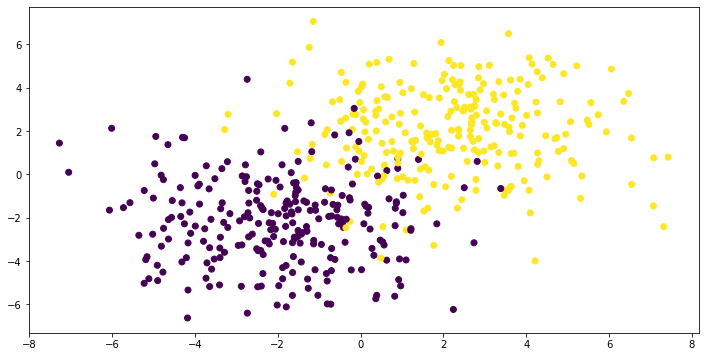

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y);  # note the coloring of the data points using the label y

# kMeans with sklearn

As with the most popular machine learning algorithm, the library sklearn has an easy way to implement the kMeans algorithm. We simply have to import the KMeans function from the sklearn.cluster library.

The documentation for this function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Once you create a KMeans object, you can use many methods and attributes to fit, predict and evaluate your model. We illustrate the steps below; essentially re-implementing the above example using only a few lines of code.

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter

km = KMeans(n_clusters=2, init='random', n_init=20, max_iter=100, random_state=888) # create KMeans object with certain settings

res = km.fit_predict(X) # fit to X and also predict labels of X, not using the easier X_simple

In [ ]:
km.cluster_centers_ # here are the centroids for kMeans, these display average value for each feature of the cluster

array([[-1.96538449, -2.28858345],
       [ 2.23966741,  2.20170647]])

Well, the data was generated randomly. So some variation is to be expected. If you increase the size of the sample, then the means should approach the values we set above for the parameter `centers`. In case this statement somewhat puzzles you, pause for a while, re-read the previous explanations and codes, and convince yourself that the empirical mean values for the two clusters should approach [-2, -2] and [2, 2], respectively.

Ok, given the way in which we generated our data, kMeans should have an easy go with it.

In [ ]:
km.n_iter_ # this is the number of iterations required for stability in this solution

7

In [ ]:
km.inertia_ # here is a value similar to total distance for the clusters

3433.7021598689744

In [ ]:
km.labels_[:10] # here are the labels for each observation from the clustering

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [ ]:
y[:10]  # here, the labels done by kMeans are consistent with our y values, they can sometimes be flipped so be careful

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

## kMeans and "True" Groups

Let's see whether the kMeans function was able to distinguish the groups of y=1 and y=0. Recall that our synthetic data comes with true cluster memberships. However, kMeans does not know about these memberships. In the previous example, we only used our data matrix `X`. We never disclosed the vector `y` to kMeans. Recall that `y` stores, for every data point, from which Gaussian it originated. Therefore, we can think of `y` as the *true* cluster assignment. 

kMeans and other cluster methods operate as **unsupervised learners**. Exploiting the fact that we know the true cluster assignment, that is `y` because of using simulated data, we can now compare the way in which kMeans has segmented the data to the original true cluster memberships. This comes down to compare the cluster labels per data points, which our custom implementation returns in the array `labels`, to their true counterparts in the array `y`.

Let's see if our results split on the y=1,0 groups or if the algorithm seems to have split the observations in a different way.


If you adjust the random seed at the top of this notebook, you may come across a situation where the kMeans function has accurately split the groups BUT flipped the labels. This is because kMeans chooses each group's labels at random.

For example, the true y could be `[1,0,1,1...]` whereas kMeans might output `[0,1,0,0...]`. 

In order to correct for this, we can use the code below. We first create Boolean index indicating where `y` is equal to `0`. We then compare this new index to the values in those positions of the result. If we see that the kMeans result actually has a larger quantity of `1` labels in those positions, we can assume that kMeans happened to assign the opposite labels.

So sklearn may have correctly split groups but chooses labels for them arbitrarily. In case our groups do not correspond with the y labels, we can simply reverse the labels.

In [ ]:
results_corrected_sk = km.labels_
label_0 = km.labels_[km.labels_ == 0]

if Counter(label_0)[1] > Counter(label_0)[0]:
  results_corrected_sk = (~results_corrected_sk.astype(bool)).astype(int)

results_corrected_sk[:5]

array([1, 1, 1, 0, 1], dtype=int32)

In [ ]:
Counter(results_corrected_sk[y == 1]) # we have a similar level of purity as we had before with the original dataset

Counter({0: 231, 1: 19})

In [ ]:
Counter(results_corrected_sk[y == 0])

Counter({1: 234, 0: 16})

Let's finish the demo with producing a scatter plot.

Again, depending upon what kind of changes you made to the code, your results might be anything. We expect to see that most data points were put into their *true cluster* while some errors were also made. This result stems from the fact that the synthetic data was easy to cluster. You can go back, change the code and increase the complexity of the clustering task. Before doing so, run the following code to plot your data one more time while highlighting the data points that have been put into the wrong cluster. I think it's fair to say that kMeans has done a fairly good  job.


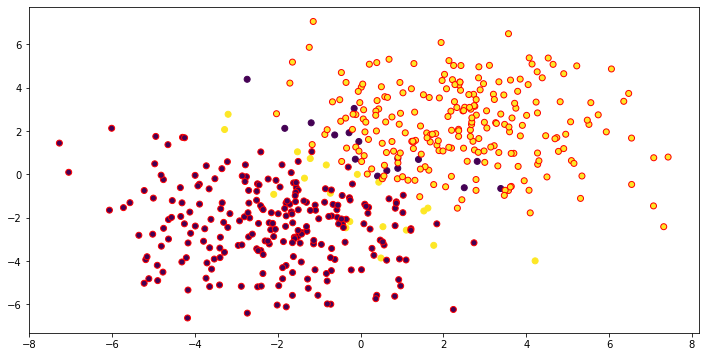

In [ ]:
idx = results_corrected_sk == y  # index of the correctly clustered data points
plt.scatter(X[idx, 0],  X[idx, 1],  c=y[idx]);  # plot these points
plt.scatter(X[~idx, 0], X[~idx, 1], c=y[~idx], edgecolor='red', linewidths=1);  # highlight wrongly clustered data points  

### Searching the optimal 'k'
In our case, we can be *pretty sure* (caution: irony in progress) that the optimal value for parameter `k`is 2. Let's pretend we would not know this. We can then use the **elbow method** to determine a suitable setting for `k` by trial and error. To that end, we run the algorithm multiple times with different settings for parameter `k`. We can then plot settings of `k` on the x-axis against the total distance on the y-axis. Wherever we see a bend in the curve (i.e. an elbow), we can consider the corresponding setting of `k` a suitable setting. Anything past the bend of the curve would make the model unnecessarily complex. We would be adding more centroids (i.e., clusters), which we would need to interpret afterwards, without increasing homogeneity in the clusters a lot. 

The following codes illustrate the elbow method for candidate settings of $k=1, ..., 8$. Depending on the size of your data sample, the code might need a little while to run.

We can perform the same elbow curve method on sklearn results. The `.inertia_` attribute on a fit kMeans object allows us to see the sum of squared distance between points and their centroid.

In [ ]:
list_total_dist_sklearn = []

for i in range(1,9):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=100, random_state=123) # go from 1 to 8 in the value of centroids
  res = km.fit_predict(X)
  list_total_dist_sklearn.append(km.inertia_) # check how inertia (~total distance) changes as we increase K

list_total_dist_sklearn

[8163.666584332819,
 3433.702159868974,
 2754.2270163009603,
 2143.693630079982,
 1772.1889361680073,
 1468.1531447117534,
 1268.2327468559768,
 1093.4151497922007]

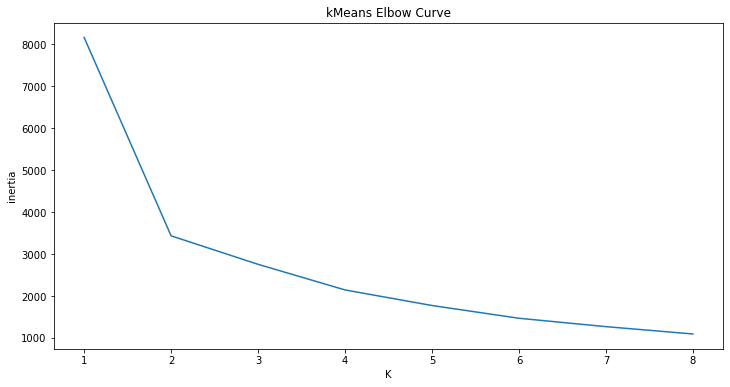

In [ ]:
plt.plot(range(1, 9), list_total_dist_sklearn) # from this graph, we can see the sharpest bend at 2 again
plt.title("kMeans Elbow Curve")
plt.ylabel("inertia")
plt.xlabel("K")
plt.show()

Here again, we can see the sharpest kink at K=2. 

